# Examen Parcial 3

*Estadística Aplicada*

**Nombre:** Verónica Vanessa Aguilar Ortiz

**Matricula:** 1855188

**Grupo:** 051


**1.- Importe las librerías que considere pertinentes**

In [78]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [79]:
from lifelines import CoxPHFitter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**2.- importe la base de datos desde mi github y asígnele el nombre de churn, es
decir churn = pd.read….**

In [80]:
churn =  pd.read_csv("https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [81]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Luego muestre que las variables descritas aquí son las que posee la base de
datos con churn.info()**

In [82]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Convertiremos la variable TotalCharges a numérica**

In [83]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges, errors ='coerce')

In [84]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


**Ahora explore si alguna de las variables tiene valores perdidos o espacios en
blanco**

In [85]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.- Note que la variable TotalCharges tiene missing values (NAN) tratremos de
determinar cuales son**

In [86]:
churn[churn.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


ahora observamos a los individuos que tienen cero meses de contrato con la
empresa

In [87]:
churn[churn["tenure"]==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**Con el siguiente código nos quedamos con los que no son missing values de la
variable TotalCharges**

In [90]:
churn = churn.dropna(subset=['TotalCharges'])

**4.- La base de datos tambien tiene algunos datos duplicados así que los
eliminaremos con el siguiente comando.**

In [91]:
churn.drop_duplicates(inplace=True)

**5.- Las variables que tienen solo tienen: Yes, No, las convertiremos a dummys**

In [92]:
#creamos una lista de esas variables

sino = [ 'Partner', 'Dependents','Churn']

#creamos un for para convertirlas juntas, cuando diga yes a 1 y cuando digan No a 0

for i in sino:
 churn[i] = churn[i].map({'Yes':1, 'No':0})


**6.- Veamos las estadísticas descriptivas de las variables numéricas y dummys**

In [93]:
churn.describe()

,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,64.798208,2283.300441,0.265785
std,0.368844,0.499729,0.457629,24.545260,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,72.000000,118.750000,8684.800000,1.000000


Comentario: Tenemos que tenure representa el tiempo en meses que llevan los clientes en la empresa suscritos, MonthlyCharges el cargo mensual en dolares, observamos que el 50% es de 29 meses, y por el promedio podemos saber que la mayoria de clientes sobrepasan los 29 meses suscritos, y al igual que suelen tener cargos mensuales más altos mientras pasa el tiempo.

**7.- Calcula el tiempo promedio que duran subscritos los clientes (tiempo
promedio de supervivencia). Calcula la función de supervivencia utilizando
Kaplan-Meier, con el la función de supervivencia, aproximadamente cual es
valor de la mediana de supervivencia y ¿qué significa?**


In [94]:
time_mean = churn['tenure'].mean()
print(f'El tiempo promedio que duran subscritos los clientes (tiempo promedio de supervivencia) es de: {time_mean}')

El tiempo promedio que duran subscritos los clientes (tiempo promedio de supervivencia) es de: 32.421786120591584


In [95]:
from lifelines import*

In [96]:
from lifelines import KaplanMeierFitter

In [97]:
KMF = KaplanMeierFitter()

<AxesSubplot:xlabel='timeline'>

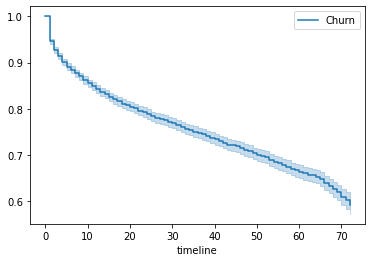

In [98]:
KMF.fit(churn['tenure'],churn['Churn'], label = "Churn").plot()

In [99]:
KMF.survival_function_

,Churn
timeline,
0.0,1.000000
1.0,0.945961
2.0,0.927835
3.0,0.913725
4.0,0.901045
...,...
68.0,0.626858
69.0,0.620135
70.0,0.609657


In [100]:
median_ = KMF.median_survival_time_

In [101]:
median_

inf

Comentario: Tenemos que el valor de la mediana de supervivencia nos manda a infinito porque como sabemos la mediana es donde se acumula el 50% pero obserbamos que para los 72 meses que es el tiempo máximo aún tenemos el 60% de los clientes.



**8.- La empresa sospecha que los que tienen cargos mensuales altos son los que
abandonan a la empresa, Asi que calcula la mediana de los cargos mensuales
(MonthlyCharges), y crea dos dataframes, uno para los que “pagan poco” es
decir, los que pagan debajo de la mediana; y los que “pagan mucho”, es decir,
los que pagan arriba de la mediana. Para cada uno estima la función de
supervivencia a través de Kaplan-Meier, grafica juntas las funciones de
supervivencia con sus intervalos de confianza. Comenta con base en la gráfica
si la empresa puede tener razón.**

In [102]:
MonthlyCharges_median = churn['MonthlyCharges'].median()
print(f'La mediana de los cargos mensuales es de: {MonthlyCharges_median}')

La mediana de los cargos mensuales es de: 70.35


In [115]:
### Pagan poco cuando pagan debajo de la mediana
### Pagan mucho cuando pagan por arriba de la mediana
PaganPoco = churn[churn['MonthlyCharges'] <= 70.35]
PaganMucho = churn[churn['MonthlyCharges'] > 70.35]

##DataFrame para guardar el tiempo y el evento
time_pp = PaganPoco['tenure']
evento_pp = PaganPoco['Churn']
time_pm = PaganMucho['tenure']
evento_pm = PaganMucho['Churn']

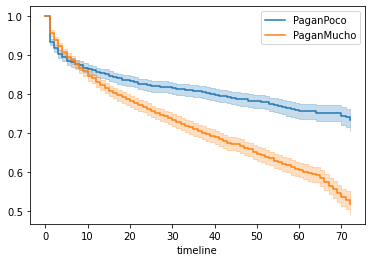

In [116]:
#Gráfica
ax = plt.subplot(111)
ax = KMF.fit(time_pp,evento_pp,label = "PaganPoco").plot(ax=ax)
ax = KMF.fit(time_pm,evento_pm,label = "PaganMucho").plot(ax=ax)

Comentario: Con base a la gráfica podemos observar que la empresa si tiene razón ya que los clientes que tienen cargos mensuales más altos son los que abandonan la empresa con mayor frecuencia.


**Realiza el log rank test para verificar si las funciones de supervivencia de los que
pagan poco y de los que pagan mucho son distintas. Comenta cual es la
conclusión.**

In [105]:
from lifelines.statistics import logrank_test
results = logrank_test(time_pp, time_pm, event_observed_A = evento_pp, event_observed_B = evento_pm)
results.print_summary()

C:\Users\veron\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          91.48 <0.005     69.58

Comentario: Tenemos que nuestras pruebas de hipotesis son: 

H0: Las funciones de supervivenvia son iguales            
H1: Las funciones de supervivenvia NO son iguales

Entonces teniendo en cuenta que nuestro p-valor es de 0.005 y nuestra alfa de 0.05, tenemos que 0.05>0.005, por lo tanto, SI se rechaza H0 por lo tanto las funciones de supervivenvia NO son iguales. 

**9.- Realiza la gráfica de Kaplan Meier, de la variable InternetService. Te debe
quedar algo así**

In [106]:
DSL = churn[churn['InternetService'] == 'DSL']
FiberOptic = churn[churn['InternetService'] == 'Fiber optic']
No = churn[churn['InternetService'] == 'No']

##DataFrame para guardar el tiempo y el evento
time_DSL = DSL['tenure']
evento_DSL = DSL['Churn']
time_Fo = FiberOptic['tenure']
evento_Fo = FiberOptic['Churn']
time_No = No['tenure']
evento_No = No['Churn']

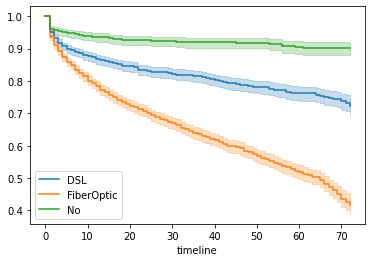

In [114]:
##Gráfica
ax = plt.subplot(111)
ax = KMF.fit(time_DSL,evento_DSL,label = "DSL").plot(ax=ax)
ax = KMF.fit(time_Fo,evento_Fo,label = "FiberOptic").plot(ax=ax)
ax = KMF.fit(time_No,evento_No,label = "No").plot(ax=ax)

**Que puedes comentar al respecto, ¿tener internet afecta el que los clientes
abandones a la empresa? ¿quiénes la abandonan más? ¿Qué explica dicho
comportamiento?**

Comentario: Con base a la gráfica obserbamos que los que tienen a abandonar con mayor frecuencia son los que tienen fibra optica, podriamos  decir que tienen este comportamiento ya que la fibra optica es más limitada, con menos accesibilidad y podria ser de mala calidad o de menor velocidad.

**10.- Antes de continuar vamos a transformar todas las variables categóricas**

In [108]:
categoricas = ['gender','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling', 'PaymentMethod']

for i in categoricas:
 churn[i] = churn[i].astype('category')
 churn[i] = churn[i].cat.codes


**Ahora estima un modelo de Cox, utilizando todas las variables disponibles para
predecir el riesgo de sufrir el evento.**

In [109]:
churn.drop(['customerID'], axis='columns', inplace = True)

In [117]:
cph = CoxPHFitter()
cph.fit(churn, duration_col='tenure', event_col='Churn')

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>

In [118]:
cph.print_summary()

C:\Users\veron\anaconda3\lib\site-packages\lifelines\utils\printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -12679.32
         time fit was run = 2022-05-19 03:07:19 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
gender            -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.05
SeniorCitizen      0.04       1.04       0.06            -0.07             0.15                 0.93                 1.16
Partner           -0.18       0.84       0.05            -0.28            -0.07                 0.75                 0.93
Dependents        -0.09       0.91       0.07            -0.23             0.04                 0.80                 1.04
PhoneService      -0.21       0.81       0.12            -0.44             0.02                 0.64                 1.02
MultipleLines     -0.08       0.92       0.03            -0.13            -0.03                 0.88                 0.97
InternetService   -0.20       0.82       0.06            -0.31            -0.08                 0.73                 0.92
OnlineSecurity    -0.22       0.80       0.03            -0.29            -0.16                 0.75                 0.85
OnlineBackup      -0.15       0.86       0.03            -0.20            -0.09                 0.82                 0.91
DeviceProtection  -0.07       0.93       0.03            -0.13            -0.02                 0.88                 0.98
TechSupport       -0.16       0.85       0.03            -0.23            -0.10                 0.80                 0.91
StreamingTV       -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
StreamingMovies   -0.09       0.91       0.03            -0.15            -0.04                 0.86                 0.96
Contract          -1.63       0.20       0.08            -1.79            -1.47                 0.17                 0.23
PaperlessBilling   0.15       1.17       0.06             0.04             0.26                 1.04                 1.30
PaymentMethod      0.20       1.22       0.03             0.15             0.25                 1.16                 1.29
MonthlyCharges     0.06       1.06       0.00             0.06             0.07                 1.06                 1.07
TotalCharges      -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00

                   cmp to      z      p   -log2(p)
covariate                                         
gender               0.00  -0.91   0.36       1.46
SeniorCitizen        0.00   0.69   0.49       1.02
Partner              0.00  -3.20 <0.005       9.48
Dependents           0.00  -1.33   0.18       2.45
PhoneService         0.00  -1.81   0.07       3.84
MultipleLines        0.00  -2.97 <0.005       8.37
InternetService      0.00  -3.39 <0.005      10.46
OnlineSecurity       0.00  -6.69 <0.005      35.40
OnlineBackup         0.00  -5.45 <0.005      24.24
DeviceProtection     0.00  -2.72   0.01       7.25
TechSupport          0.00  -5.02 <0.005      20.90
StreamingTV          0.00  -3.29 <0.005       9.98
StreamingMovies      0.00  -3.25 <0.005       9.77
Contract             0.00 -19.77 <0.005     286.45
PaperlessBilling     0.00   2.72   0.01       7.27
PaymentMethod        0.00   7.31 <0.005      41.71
MonthlyCharges       0.00  27.12 <0.005     535.51
TotalCharges         0.00 -38.96 <0.005        inf
---
Concordance = 0.93
Partial AIC = 25394.64
log-likelihood ratio test = 5947.44 on 18 df
-log2(p) of ll-ratio test = inf

**Utiliza cph.plot() para ayudarte con la interpretación.**

<AxesSubplot:xlabel='log(HR) (95% CI)'>

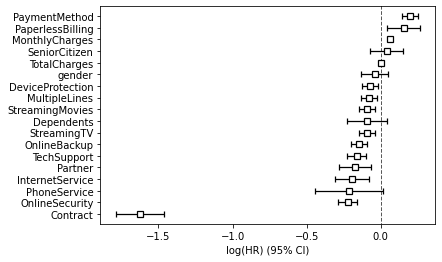

In [111]:
cph.plot() 

**Revisa el coeficiente de MonthlyCharges, ¿coincide con lo hallado en el punto
8?**

Comentario: Revisando el coeficiende de MonthlyChanges ponermos decir que si conicide con lo hallado en el punto 8.

**11. Por último, con lo encontrado en tu modelo, ¿qué estrategias podría seguir
la empresa para tratar de conservar a sus clientes?**

Comentario: Como se comento en el punto 9, los clientes que utilizan la fibra optica son los que con mayor frecuencia suelen abandonar la empresa, entonces aqui es uno de los problemas, lo que puede hacer la empresa para conservar a sus clientes seria cambiar a una mejor calidad de esta u ofrecer un cambio a DSL. Y otro tema a considerar son los clientes que tienen montos más altos mensualmente, ya que estos tambien suelen abandonar la empresa, seria revisar estos pagos y realizar un ajuste para beneficio de los clientes.